In [1]:
def haversine_distance(lat1, lon1, lat2, lon2):
    r = 6371
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2)**2
    res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
    return np.round(res, 2)

In [2]:
from oauthlib.oauth2 import BackendApplicationClient

from requests.auth import HTTPBasicAuth
from requests_oauthlib import OAuth2Session

import requests

import pandas as pd  # type: ignore[import]
import numpy as np  # type: ignore[import]

client_id = 'MIHfLxWCp7A6Wwd4gajFBkxUkvngSxugqdoWwcny'
client_secret = 'oqYp9yPCfNzLMTEIplXyuAEG4e2HNojoQxn5W9VWmxY1NxCSnCojnaOkqGl3aAWikwv8gGbMhyySFUALMRjOg4bSdXOQUaZdKea55mhR5diOKRY3vHS68MxjMY3iKTzP'

auth = HTTPBasicAuth(client_id, client_secret)
client = BackendApplicationClient(client_id=client_id)
oauth = OAuth2Session(client=client)
token = oauth.fetch_token(token_url='https://auth.poseidon.hcmr.gr/o/token/', auth=auth)
print(token)

my_headers = {'Authorization' : 'Bearer ' + token.get('access_token')}

apiString = 'https://api.poseidon.hcmr.gr/api/platforms/'
platforms_df_list = []

while True:
    print(apiString)
    response = requests.get(apiString, headers=my_headers)

    json_response = response.json()
    
    df = pd.DataFrame.from_dict(json_response['results'])
    
    platforms_df_list.append(df)
        
    if json_response['next'] == None:
        break
    else:
        apiString = json_response['next']
        
platforms_df = pd.concat(platforms_df_list)

lat_upper = 36.1512
lon_upper = 25.7877
lat_lower = 35.3577
lon_lower = 24.4418

# GET PLATFORMS IN AEGEAN NEAR HERAKLION
platforms_near_her = platforms_df.loc[(platforms_df['lat'] >= lat_lower) & (platforms_df['lat'] <= lat_upper) & (platforms_df['lon'] >= lon_lower) & (platforms_df['lon'] <= lon_upper)]
# GET ACTIVE PLATFORMS
platforms_near_her_active = platforms_near_her.loc[platforms_near_her['status'] == True]


{'token_type': 'Bearer', 'access_token': 'T70YrdYqcFFcdxt8x0AgHSw4dvXI0V', 'expires_in': 900, 'scope': ['user'], 'expires_at': 1632910385.526145}
https://api.poseidon.hcmr.gr/api/platforms/
https://api.poseidon.hcmr.gr/api/platforms/?limit=1000&offset=1000
https://api.poseidon.hcmr.gr/api/platforms/?limit=1000&offset=2000
https://api.poseidon.hcmr.gr/api/platforms/?limit=1000&offset=3000
https://api.poseidon.hcmr.gr/api/platforms/?limit=1000&offset=4000
https://api.poseidon.hcmr.gr/api/platforms/?limit=1000&offset=5000
https://api.poseidon.hcmr.gr/api/platforms/?limit=1000&offset=6000
https://api.poseidon.hcmr.gr/api/platforms/?limit=1000&offset=7000


In [3]:
paralies_df = pd.read_csv('paralies.csv', encoding='iso8859_7')
paralies_df


,Παραλία_Όνομα,latitude,longitude
0,Παραλία Ελούντα /Porto Elounda,35.265115,25.722581
1,Παραλία Ελούντα /Porto Elounda,35.264958,25.723574
2,Παραλία Ελούντα /Porto Elounda,35.263635,25.723320
3,Παραλία Ελούντα /Porto Elounda,35.263709,25.722612
4,Παραλία Αδελιανός Κάμπος Α,35.372767,24.511086
5,Παραλία Αδελιανός Κάμπος Α,35.382028,24.505923
6,Παραλία Αδελιανός Κάμπος Α,35.388522,24.559322
7,Παραλία Αδελιανός Κάμπος Α,35.381487,24.562862
8,Παραλία Καστρί/Creta Maris,34.997467,25.371398
9,Παραλία Καστρί/Creta Maris,34.997024,25.371692


In [4]:
platforms_near_paralies = {}

for paralia in paralies_df['Παραλία_Όνομα'].unique():
    paralia_df = paralies_df[paralies_df['Παραλία_Όνομα'] == paralia]
 
    platforms_near_paralies[paralia] = \
        platforms_df.loc[(platforms_df['lat'] >= paralia_df.latitude.min()) \
        & (platforms_df['lat'] <= paralia_df.latitude.max()) \
        & (platforms_df['lon'] >= paralia_df.longitude.min()) \
        & (platforms_df['lon'] <= paralia_df.longitude.max())]

In [5]:
platforms_near_paralies

{'Παραλία Ελούντα /Porto Elounda': Empty DataFrame
 Columns: [id, pid, tspr, type, dts, dte, lat, lon, status, params, platform_code, wmo, pi_name, author, contact, island, pl_name, inst_ref, assembly_center, site_code, source, cdf_inst, inst]
 Index: []
 
 [0 rows x 23 columns],
 'Παραλία Αδελιανός Κάμπος Α ': Empty DataFrame
 Columns: [id, pid, tspr, type, dts, dte, lat, lon, status, params, platform_code, wmo, pi_name, author, contact, island, pl_name, inst_ref, assembly_center, site_code, source, cdf_inst, inst]
 Index: []
 
 [0 rows x 23 columns],
 'Παραλία Καστρί/Creta Maris': Empty DataFrame
 Columns: [id, pid, tspr, type, dts, dte, lat, lon, status, params, platform_code, wmo, pi_name, author, contact, island, pl_name, inst_ref, assembly_center, site_code, source, cdf_inst, inst]
 Index: []
 
 [0 rows x 23 columns],
 'Παραλία Κοκκίνη Χάνι/Knossos Beach': Empty DataFrame
 Columns: [id, pid, tspr, type, dts, dte, lat, lon, status, params, platform_code, wmo, pi_name, author, cont

In [6]:
paralies_df['Παραλία_Όνομα']

for paralia in paralies_df['Παραλία_Όνομα'].unique():
    paralia_df = paralies_df[paralies_df['Παραλία_Όνομα'] == paralia]
    
    avg_lat = paralia_df.latitude.mean()
    avg_lon = paralia_df.longitude.mean()
        
    paralies_df.loc[paralies_df['Παραλία_Όνομα'] == paralia, ['avg_lat', 'avg_lon']] = avg_lat, avg_lon

paralies_df = paralies_df.drop_duplicates(subset=['avg_lat', 'avg_lon'])

In [7]:
haversine_distance(35.265115, 25.722581, 35.341846,  25.148254)

52.81

In [8]:
platforms_active = platforms_df[platforms_df['status'] == True]

dists_df = pd.DataFrame(columns=['distance (km)', 'tspr', 'type', 'pid','Παραλία_Όνομα' ])
dists_df_active = pd.DataFrame(columns=['distance (km)', 'tspr', 'type', 'pid','Παραλία_Όνομα' ])

for idx in paralies_df.index:
    dists = platforms_df.apply(lambda row: \
                    pd.Series([haversine_distance(row['lat'], row['lon'], \
                    paralies_df.loc[idx].avg_lat, paralies_df.loc[idx].avg_lon),\
                    row.tspr, row.type, row.pid, paralies_df.loc[idx]['Παραλία_Όνομα']],\
                    index=['distance (km)', 'tspr', 'type', 'pid','Παραλία_Όνομα']), axis=1)
    dists_active = platforms_active.apply(lambda row: \
                    pd.Series([haversine_distance(row['lat'], row['lon'], \
                    paralies_df.loc[idx].avg_lat, paralies_df.loc[idx].avg_lon),\
                    row.tspr, row.type, row.pid, paralies_df.loc[idx]['Παραλία_Όνομα']],\
                    index=['distance (km)', 'tspr', 'type', 'pid','Παραλία_Όνομα']), axis=1)
    dists = dists.sort_values('distance (km)') 
    dists_active = dists_active.sort_values('distance (km)')
    dists_df = pd.concat([dists_df, dists])
    dists_df_active = pd.concat([dists_df_active, dists_active])
    
#haversine_distance(row['lat'], row['lon'], paralies_df.loc[idx].avg_lat, paralies_df.loc[idx].avg_lon), axis=1)  

In [33]:
dists_df.to_csv('distances_to_beaches_all.csv', index=False)
dists_df[dists_df['distance (km)'] < 100].to_csv('distances_to_beaches_all_100km.csv', index=False)
dists_df_active.to_csv('distances_to_beaches_all_active.csv', index=False)
dists_df_active[dists_df_active['distance (km)'] < 100].to_csv('distances_to_beaches_all_active_100km.csv', index=False)


In [9]:
dists_df[dists_df['distance (km)'] < 100]

,distance (km),tspr,type,pid,Παραλία_Όνομα
835,5.95,TS,DC,bmed-b14320,Παραλία Ελούντα /Porto Elounda
664,23.00,PR,CT,EXO10746,Παραλία Ελούντα /Porto Elounda
345,23.00,PR,XB,EXO10746,Παραλία Ελούντα /Porto Elounda
274,24.66,TS,DC,ba34437,Παραλία Ελούντα /Porto Elounda
362,25.77,TS,DC,bb34437,Παραλία Ελούντα /Porto Elounda
...,...,...,...,...,...
737,95.66,PR,XB,SHIPBB,Δασούδι
632,97.21,PR,PF,6903201,Δασούδι
925,98.59,PR,BO,EXO12747,Δασούδι
635,98.59,PR,CT,EXO12747,Δασούδι


In [18]:
platforms_near_her_active.iloc[1]

id                                                              2663
pid                                                            61277
tspr                                                              TS
type                                                              MO
dts                                              2007-05-28 12:00:00
dte                                              2021-09-28 15:00:00
lat                                                          35.7263
lon                                                          25.1307
status                                                          True
params             ATMS DEPH DOX1 DRYT FLU2 GDIR GSPD HCDT HCSP P...
platform_code                                                  61277
wmo                                                            61277
pi_name                                        Leonidas Perivoliotis
author                                                              
contact                         ma

In [6]:
platforms_near_her_active.iloc[1].params

'ATMS DEPH DOX1 DRYT FLU2 GDIR GSPD HCDT HCSP PHPH PRES PSAL TEMP TUR4 VHM0 VMDR VTM02 VTPK VZMX WDIR WSPD'

In [7]:
platforms_near_her_active.iloc[2]

id                                                              2872
pid                                                        HERAKLION
tspr                                                              TS
type                                                              MO
dts                                              2016-07-15 09:00:00
dte                                              2021-09-25 15:00:00
lat                                                          35.4342
lon                                                          25.0792
status                                                          True
params             ATMS DEPH DRYT FLU2 GSPD HCDT HCSP PHPH PSAL T...
platform_code                                              HERAKLION
wmo                                                                 
pi_name                                        Leonidas Perivoliotis
author                                                              
contact                         ma

In [4]:
client_id = 'MIHfLxWCp7A6Wwd4gajFBkxUkvngSxugqdoWwcny'
client_secret = 'oqYp9yPCfNzLMTEIplXyuAEG4e2HNojoQxn5W9VWmxY1NxCSnCojnaOkqGl3aAWikwv8gGbMhyySFUALMRjOg4bSdXOQUaZdKea55mhR5diOKRY3vHS68MxjMY3iKTzP'

auth = HTTPBasicAuth(client_id, client_secret)
client = BackendApplicationClient(client_id=client_id)
oauth = OAuth2Session(client=client)
token = oauth.fetch_token(token_url='https://auth.poseidon.hcmr.gr/o/token/', auth=auth)
print(token)

my_headers = {'Authorization' : 'Bearer ' + token.get('access_token')}

# GET WIND DIRECTION
param_names = 'WDIR, WSPD'

apiDataString = 'https://api.poseidon.hcmr.gr/api/data/' + \
        platforms_near_her_active.iloc[1].tspr + '_' + \
        platforms_near_her_active.iloc[1].type + '_' + \
        platforms_near_her_active.iloc[1].pid + '/' + \
        '?param__pname__in=' + param_names

data_df_list = []

while True:
    print(apiDataString)
    response = requests.get(apiDataString, headers=my_headers)

    json_response = response.json()
    
    df = pd.DataFrame.from_dict(json_response['results'])
    
    data_df_list.append(df)
        
    if json_response['next'] == None:
        break
    else:
        apiDataString = json_response['next']
        
data_df = pd.concat(data_df_list)

{'expires_in': 900, 'access_token': '4kgk6ukyiEs2qHSay3bSeP3PZBKD7r', 'token_type': 'Bearer', 'scope': ['user'], 'expires_at': 1630939797.2991786}
https://api.poseidon.hcmr.gr/api/data/TS_MO_HERAKLION/?param__pname__in=WDIR, WSPD
https://api.poseidon.hcmr.gr/api/data/TS_MO_HERAKLION/?limit=1000&offset=1000&param__pname__in=WDIR%2C+WSPD
https://api.poseidon.hcmr.gr/api/data/TS_MO_HERAKLION/?limit=1000&offset=2000&param__pname__in=WDIR%2C+WSPD
https://api.poseidon.hcmr.gr/api/data/TS_MO_HERAKLION/?limit=1000&offset=3000&param__pname__in=WDIR%2C+WSPD
https://api.poseidon.hcmr.gr/api/data/TS_MO_HERAKLION/?limit=1000&offset=4000&param__pname__in=WDIR%2C+WSPD
https://api.poseidon.hcmr.gr/api/data/TS_MO_HERAKLION/?limit=1000&offset=5000&param__pname__in=WDIR%2C+WSPD
https://api.poseidon.hcmr.gr/api/data/TS_MO_HERAKLION/?limit=1000&offset=6000&param__pname__in=WDIR%2C+WSPD
https://api.poseidon.hcmr.gr/api/data/TS_MO_HERAKLION/?limit=1000&offset=7000&param__pname__in=WDIR%2C+WSPD
https://api.po

In [5]:
data_df

,id,dt,lat,lon,posqc,pres,presqc,param,val,valqc,dvalqc
0,10645,2016-07-20T09:00:00Z,35.4342,25.0783,1,-3.0,1,32,310.02200,1,0
1,10647,2016-07-20T09:00:00Z,35.4342,25.0783,1,-3.0,1,33,7.35357,1,0
2,10658,2016-07-20T12:00:00Z,35.4344,25.0783,1,-3.0,1,32,314.78800,1,0
3,10660,2016-07-20T12:00:00Z,35.4344,25.0783,1,-3.0,1,33,7.98736,1,0
4,10671,2016-07-20T15:00:00Z,35.4342,25.0783,1,-3.0,1,32,314.34700,1,0
...,...,...,...,...,...,...,...,...,...,...,...
957,159001,2021-09-06T09:00:00Z,35.4242,25.0745,1,-3.0,1,33,0.00000,4,0
958,159014,2021-09-06T12:00:00Z,35.4242,25.0745,1,-3.0,1,32,0.00000,4,0
959,159016,2021-09-06T12:00:00Z,35.4242,25.0745,1,-3.0,1,33,0.00000,4,0
960,159029,2021-09-06T15:00:00Z,35.4242,25.0745,1,-3.0,1,32,0.00000,4,0


# SEPARATE WIND SPEED AND DIRECTION DATAFRAMES

In [6]:
df_wind_direction = data_df[data_df['param'] == 32] # GET SUBSET FOR WIND DIRECTION
df_wind_direction = df_wind_direction.set_index('dt') # REINDEX WITH DATE

df_wind_speed = data_df[data_df['param'] == 33] # GET SUBSET FOR WIND DIRECTION
df_wind_speed = df_wind_speed.set_index('dt') # REINDEX WITH DATE

df_direction_speed = pd.concat([df_wind_direction['val'], df_wind_speed['val']], axis=1, keys=['DIRECTION','SPEED'])


In [7]:
data_df[200:239] # 2 MEASUREMENTS MISSING (QUESTION) - MAKE DATAFRAME WITH ALL DATES AND SEE WHICH MEASUREMENTS MISS

,id,dt,lat,lon,posqc,pres,presqc,param,val,valqc,dvalqc
200,11945,2016-08-04T09:00:00Z,35.4356,25.0789,1,-3.0,1,32,293.33700,1,0
201,11947,2016-08-04T09:00:00Z,35.4356,25.0789,1,-3.0,1,33,8.70861,1,0
202,11958,2016-08-04T12:00:00Z,35.4344,25.0792,1,-3.0,1,32,297.83500,1,0
203,11960,2016-08-04T12:00:00Z,35.4344,25.0792,1,-3.0,1,33,8.40694,1,0
204,11971,2016-08-04T15:00:00Z,35.4342,25.0789,1,-3.0,1,32,305.62600,1,0
205,11973,2016-08-04T15:00:00Z,35.4342,25.0789,1,-3.0,1,33,8.45000,1,0
206,11984,2016-08-04T18:00:00Z,35.4342,25.0792,1,-3.0,1,32,284.26900,1,0
207,11986,2016-08-04T18:00:00Z,35.4342,25.0792,1,-3.0,1,33,7.59951,1,0
208,11997,2016-08-05T09:00:00Z,35.4344,25.0789,1,-3.0,1,32,322.96800,1,0
209,11999,2016-08-05T09:00:00Z,35.4344,25.0789,1,-3.0,1,33,8.44433,1,0


In [7]:
df_direction_speed['DATE'] = df_direction_speed.index # GET COLUMN DATE
df_direction_speed

,DIRECTION,SPEED,DATE
dt,,,
2016-07-20T09:00:00Z,310.022,7.35357,2016-07-20T09:00:00Z
2016-07-20T12:00:00Z,314.788,7.98736,2016-07-20T12:00:00Z
2016-07-20T15:00:00Z,314.347,8.84742,2016-07-20T15:00:00Z
2016-07-20T18:00:00Z,299.152,8.72039,2016-07-20T18:00:00Z
2016-07-20T21:00:00Z,287.438,7.93911,2016-07-20T21:00:00Z
...,...,...,...
2021-09-06T00:00:00Z,0.000,0.00000,2021-09-06T00:00:00Z
2021-09-06T03:00:00Z,0.000,0.00000,2021-09-06T03:00:00Z
2021-09-06T06:00:00Z,0.000,0.00000,2021-09-06T06:00:00Z


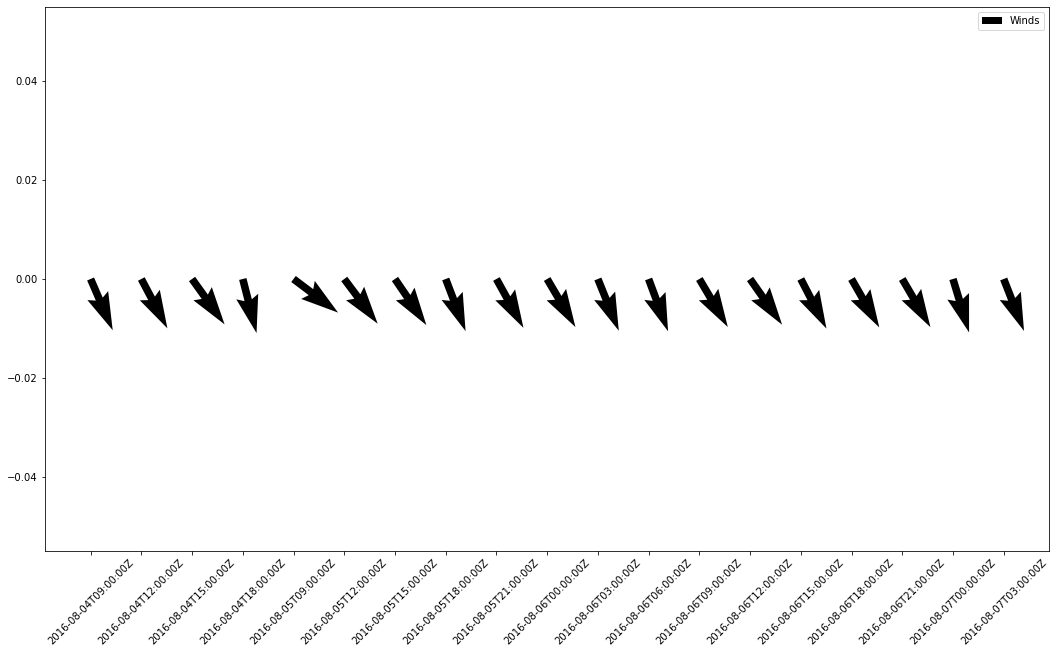

In [21]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

subset = df_direction_speed[100:119]

U = np.cos(subset['DIRECTION']*np.pi/180)
V = np.sin(subset['DIRECTION']*np.pi/180)

fig, ax = plt.subplots()
ax.quiver(U, V, label='Winds')
ax.legend()
ax.set_xticks(subset.reset_index().index)
ax.set_xticklabels(subset['DATE'])

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

fig.set_size_inches(18, 10, forward=True)

## TEST SWITCH PANDAS DATAFRAME TO SPARK DATAFRAME AND VICE VERSA

In [15]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('poseidon').getOrCreate()

import pandas as pd  # type: ignore[import]
import numpy as np  # type: ignore[import]

spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")
# Generate a Pandas DataFrame
# pdf = pd.DataFrame(np.random.rand(100, 3))


# Create a Spark DataFrame from a Pandas DataFrame using Arrow
spark_df = spark.createDataFrame(subset)

# Convert the Spark DataFrame back to a Pandas DataFrame using Arrow
pandas_df = df.toPandas()


In [17]:
spark_df.show()

+---------+-------+--------------------+
|DIRECTION|  SPEED|                DATE|
+---------+-------+--------------------+
|  293.337|8.70861|2016-08-04T09:00:00Z|
|  297.835|8.40694|2016-08-04T12:00:00Z|
|  305.626|   8.45|2016-08-04T15:00:00Z|
|  284.269|7.59951|2016-08-04T18:00:00Z|
|  322.968|8.44433|2016-08-05T09:00:00Z|
|    306.8|8.05897|2016-08-05T12:00:00Z|
|  304.248|8.17406|2016-08-05T15:00:00Z|
|   290.88|7.17939|2016-08-05T18:00:00Z|
|  298.954|5.69189|2016-08-05T21:00:00Z|
|  300.473|6.65548|2016-08-06T00:00:00Z|
|  292.016|7.74898|2016-08-06T03:00:00Z|
|  290.419|6.04975|2016-08-06T06:00:00Z|
|  300.662|6.89294|2016-08-06T09:00:00Z|
|  305.023| 5.9599|2016-08-06T12:00:00Z|
|  297.364|6.26819|2016-08-06T15:00:00Z|
|  299.832|6.28732|2016-08-06T18:00:00Z|
|  300.325|4.40068|2016-08-06T21:00:00Z|
|  286.786|6.19032|2016-08-07T00:00:00Z|
|  291.373|7.18332|2016-08-07T03:00:00Z|
+---------+-------+--------------------+

